In [ ]:
pip install dask

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yellow_tripdata_2023-01.parquet to yellow_tripdata_2023-01.parquet


In [ ]:
# Libraries
import dask.dataframe as dd
import polars as pl
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

In [ ]:
file_path = 'yellow_tripdata_2023-01.parquet'

In [ ]:
#Step 2: Data Cleaning - Drop NA
# ---------------------------

print("\nMeasuring dropna/drop_nulls performance...")

# Dropna in Dask
start = time.time()
dask_memory_clean = measure_memory(df_dask.dropna, subset=['trip_distance', 'fare_amount'])
df_dask_clean = df_dask.dropna(subset=['trip_distance', 'fare_amount'])
dask_dropped_rows = df_dask.shape[0].compute() - df_dask_clean.shape[0].compute()
end = time.time()
dask_dropna_time = end - start

# Drop nulls in Polars
start = time.time()
def drop_nulls_polars():
    return df_polars.drop_nulls(subset=['trip_distance', 'fare_amount']).collect()

polars_memory_clean = measure_memory(drop_nulls_polars)
df_polars_clean = drop_nulls_polars()
polars_dropped_rows = df_polars.collect().height - df_polars_clean.height
end = time.time()
polars_dropna_time = end - start

print(f"Dask Drop NA Time: {dask_dropna_time:.2f}s, Memory: {dask_memory_clean:.2f} MiB, Rows Dropped: {dask_dropped_rows}")
print(f"Polars Drop Nulls Time: {polars_dropna_time:.2f}s, Memory: {polars_memory_clean:.2f} MiB, Rows Dropped: {polars_dropped_rows}")



Measuring dropna/drop_nulls performance...
Dask Drop NA Time: 7.94s, Memory: 1910.92 MiB, Rows Dropped: 0
Polars Drop Nulls Time: 2.17s, Memory: 2824.08 MiB, Rows Dropped: 0


In [ ]:
# Step 3: Aggregation
# ---------------------------

print("\nMeasuring aggregation performance...")

# Aggregation in Dask
start = time.time()
mean_dask = df_dask_clean['trip_distance'].mean().compute()
median_dask = df_dask_clean['trip_distance'].quantile(0.5).compute()
end = time.time()
dask_agg_time = end - start

# Aggregation in Polars
start = time.time()
mean_polars = df_polars_clean['trip_distance'].mean()
median_polars = df_polars_clean['trip_distance'].median()
end = time.time()
polars_agg_time = end - start

print(f"Dask Aggregation - Mean: {mean_dask:.2f}, Median: {median_dask:.2f}, Time: {dask_agg_time:.2f}s")
print(f"Polars Aggregation - Mean: {mean_polars:.2f}, Median: {median_polars:.2f}, Time: {polars_agg_time:.2f}s")



Measuring aggregation performance...
Dask Aggregation - Mean: 3.85, Median: 1.80, Time: 4.93s
Polars Aggregation - Mean: 3.85, Median: 1.80, Time: 0.06s


In [ ]:
# Libraries
import dask.dataframe as dd
import polars as pl
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# File path
file_path = 'yellow_tripdata_2023-01.parquet'

In [ ]:
# Step 1: Dataset Load
# ---------------------------

# Memory profiler wrapper
def measure_memory(func, *args, **kwargs):
    mem_usage = memory_usage((func, args, kwargs))
    return max(mem_usage)

# Function to load dataset using Dask
def load_dask():
    return dd.read_parquet(file_path)
    dd.shape()

# Function to load dataset using Polars
def load_polars():
    return pl.scan_parquet(file_path)  # Lazy loading

# Measure Load Time and Memory
print("Measuring dataset load performance...")
start = time.time()
dask_memory = measure_memory(load_dask)
df_dask = load_dask()
end = time.time()
dask_load_time = end - start

start = time.time()
polars_memory = measure_memory(load_polars)
df_polars = load_polars()
end = time.time()
polars_load_time = end - start

print(f"Dask Load Time: {dask_load_time:.2f}s, Memory: {dask_memory:.2f} MiB")
print(f"Polars Load Time: {polars_load_time:.2f}s, Memory: {polars_memory:.2f} MiB")

Measuring dataset load performance...
Dask Load Time: 0.65s, Memory: 1040.12 MiB
Polars Load Time: 1.04s, Memory: 1040.12 MiB


In [ ]:
# ---------------------------
# Step 2: Data Cleaning - Drop NA
# ---------------------------

print("\nMeasuring dropna/drop_nulls performance...")

# Dropna in Dask
start = time.time()
dask_memory_clean = measure_memory(df_dask.dropna, subset=['trip_distance', 'fare_amount'])
df_dask_clean = df_dask.dropna(subset=['trip_distance', 'fare_amount'])
dask_dropped_rows = df_dask.shape[0].compute() - df_dask_clean.shape[0].compute()
end = time.time()
dask_dropna_time = end - start

# Drop nulls in Polars
start = time.time()
def drop_nulls_polars():
    return df_polars.drop_nulls(subset=['trip_distance', 'fare_amount']).collect()

polars_memory_clean = measure_memory(drop_nulls_polars)
df_polars_clean = drop_nulls_polars()
polars_dropped_rows = df_polars.collect().height - df_polars_clean.height
end = time.time()
polars_dropna_time = end - start

print(f"Dask Drop NA Time: {dask_dropna_time:.2f}s, Memory: {dask_memory_clean:.2f} MiB, Rows Dropped: {dask_dropped_rows}")
print(f"Polars Drop Nulls Time: {polars_dropna_time:.2f}s, Memory: {polars_memory_clean:.2f} MiB, Rows Dropped: {polars_dropped_rows}")


Measuring dropna/drop_nulls performance...
Dask Drop NA Time: 13.64s, Memory: 1024.70 MiB, Rows Dropped: 0
Polars Drop Nulls Time: 3.21s, Memory: 1573.48 MiB, Rows Dropped: 0


In [ ]:
# ---------------------------
# Step 3: Aggregation
# ---------------------------

print("\nMeasuring aggregation performance...")

# Aggregation in Dask
start = time.time()
mean_dask = df_dask_clean['trip_distance'].mean().compute()
median_dask = df_dask_clean['trip_distance'].quantile(0.5).compute()
end = time.time()
dask_agg_time = end - start

# Aggregation in Polars
start = time.time()
mean_polars = df_polars_clean['trip_distance'].mean()
median_polars = df_polars_clean['trip_distance'].median()
end = time.time()
polars_agg_time = end - start

print(f"Dask Aggregation - Mean: {mean_dask:.2f}, Median: {median_dask:.2f}, Time: {dask_agg_time:.2f}s")
print(f"Polars Aggregation - Mean: {mean_polars:.2f}, Median: {median_polars:.2f}, Time: {polars_agg_time:.2f}s")



Measuring aggregation performance...
Dask Aggregation - Mean: 3.85, Median: 1.80, Time: 6.07s
Polars Aggregation - Mean: 3.85, Median: 1.80, Time: 0.04s


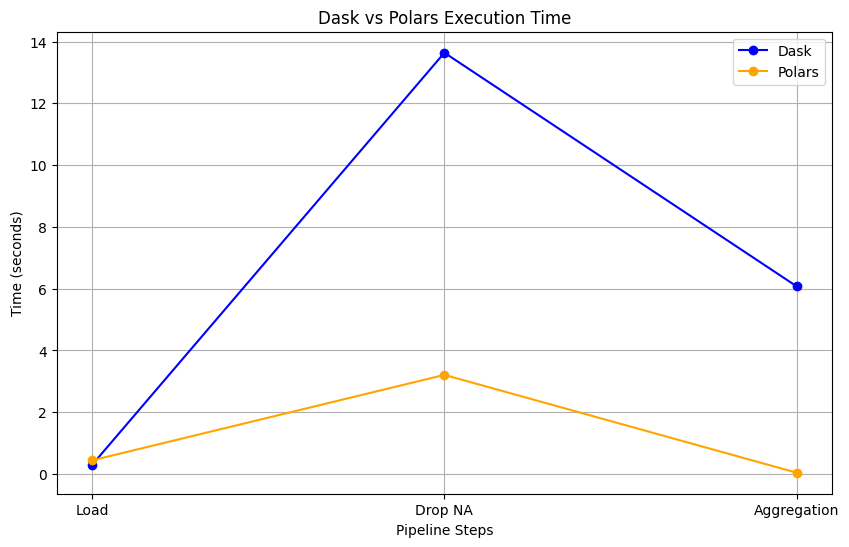

In [ ]:
# ---------------------------
# Step 4: Visualize Results
# ---------------------------

# Execution Time Comparison
steps = ['Load', 'Drop NA', 'Aggregation']
dask_times = [dask_load_time, dask_dropna_time, dask_agg_time]
polars_times = [polars_load_time, polars_dropna_time, polars_agg_time]

plt.figure(figsize=(10, 6))
plt.plot(steps, dask_times, marker='o', label='Dask', color='blue')
plt.plot(steps, polars_times, marker='o', label='Polars', color='orange')
plt.title('Dask vs Polars Execution Time')
plt.xlabel('Pipeline Steps')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid()
plt.show()


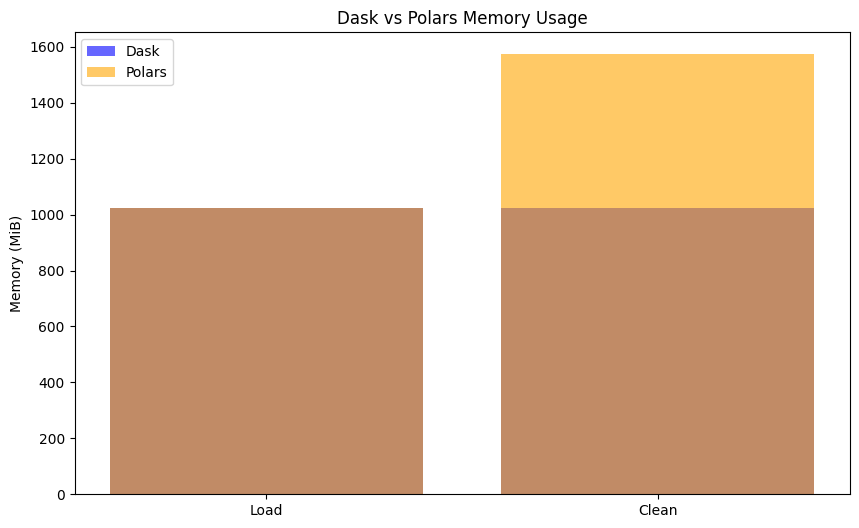

In [ ]:
# Memory Usage Comparison
dask_memory_usage = [dask_memory, dask_memory_clean]
polars_memory_usage = [polars_memory, polars_memory_clean]

plt.figure(figsize=(10, 6))
x_labels = ['Load', 'Clean']
plt.bar(x_labels, dask_memory_usage, color='blue', alpha=0.6, label='Dask')
plt.bar(x_labels, polars_memory_usage, color='orange', alpha=0.6, label='Polars')
plt.title('Dask vs Polars Memory Usage')
plt.ylabel('Memory (MiB)')
plt.legend()
plt.show()


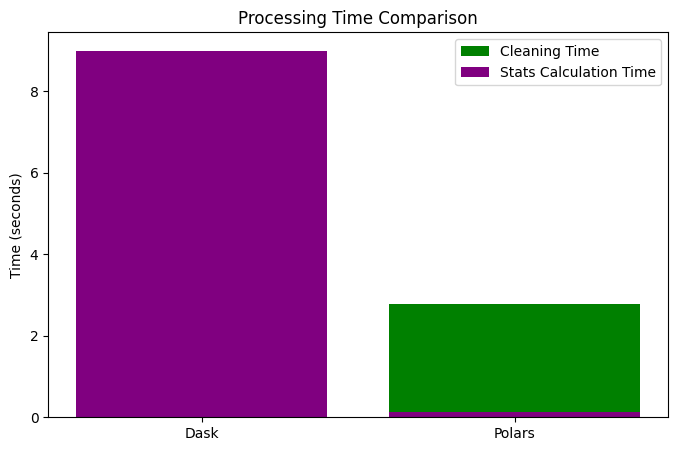

In [ ]:
# Processing Time Comparison
processing_times = [dask_stats_time, polars_stats_time]
clean_times = [dask_clean_time, polars_clean_time]

plt.figure(figsize=(8, 5))
plt.bar(frameworks, clean_times, label='Cleaning Time', color='green')
plt.bar(frameworks, processing_times, label='Stats Calculation Time', color='purple')
plt.ylabel('Time (seconds)')
plt.title('Processing Time Comparison')
plt.legend()
plt.show()

In [ ]:

# Final Results Summary
print("\nSummary:")
print(f"Dask Total Time: {sum(dask_times):.2f}s, Total Memory Used: {sum(dask_memory_usage):.2f} MiB")
print(f"Polars Total Time: {sum(polars_times):.2f}s, Total Memory Used: {sum(polars_memory_usage):.2f} MiB")


Summary:
Dask Total Time: 20.01s, Total Memory Used: 2049.46 MiB
Polars Total Time: 3.69s, Total Memory Used: 2598.25 MiB
